In [5]:
#Step 1: Data Exploration & Understanding
#1.1
import pandas as pd
df = pd.read_csv("C:/Users/chida/Downloads/panic_disorder_detection.csv")

# To confirm for loading ( Show the first 5 rows) 
print(df.head())

   Participant ID  Age  Gender Family History Personal History  \
0               1   38    Male             No              Yes   
1               2   51    Male             No               No   
2               3   32  Female            Yes               No   
3               4   64  Female             No               No   
4               5   31    Male            Yes               No   

  Current Stressors             Symptoms  Severity Impact on Life  \
0          Moderate  Shortness of breath      Mild           Mild   
1              High        Panic attacks      Mild           Mild   
2              High        Panic attacks      Mild    Significant   
3          Moderate           Chest pain  Moderate       Moderate   
4          Moderate        Panic attacks      Mild       Moderate   

  Demographics Medical History  Psychiatric History Substance Use  \
0        Rural        Diabetes     Bipolar disorder           NaN   
1        Urban          Asthma     Anxiety disorde

In [7]:
#1.2
print(df.info())
print(df.describe())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Participant ID            120000 non-null  int64 
 1   Age                       120000 non-null  int64 
 2   Gender                    120000 non-null  object
 3   Family History            120000 non-null  object
 4   Personal History          120000 non-null  object
 5   Current Stressors         120000 non-null  object
 6   Symptoms                  120000 non-null  object
 7   Severity                  120000 non-null  object
 8   Impact on Life            120000 non-null  object
 9   Demographics              120000 non-null  object
 10  Medical History           89776 non-null   object
 11  Psychiatric History       90104 non-null   object
 12  Substance Use             79922 non-null   object
 13  Coping Mechanisms         120000 non-null  object
 14  Soci

In [33]:
#1.3
print("Missing values per column:\n", df.isnull().sum())
print("\nTotal missing values:", df.isnull().sum().sum())
print("\nTotal duplicate rows:", df.duplicated().sum())
duplicate_rows = df[df.duplicated()]
print("\nDuplicate rows preview:\n", duplicate_rows)

Missing values per column:
 Participant ID                  0
Age                             0
Gender                          0
Family History                  0
Personal History                0
Current Stressors               0
Symptoms                        0
Severity                        0
Impact on Life                  0
Demographics                    0
Medical History             30224
Psychiatric History         29896
Substance Use               40078
Coping Mechanisms               0
Social Support                  0
Lifestyle Factors               0
Panic Disorder Diagnosis        0
dtype: int64

Total missing values: 100198

Total duplicate rows: 19601

Duplicate rows preview:
         Participant ID  Age  Gender Family History Personal History  \
100000           95211   52  Female             No               No   
100001           13952   26  Female            Yes               No   
100002           50339   38  Female            Yes              Yes   
100003      

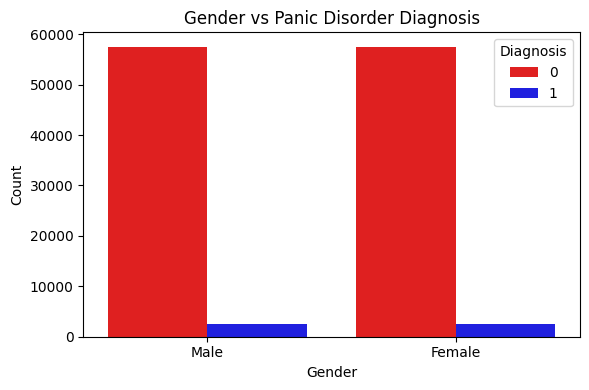

In [33]:
#1.4
#A-
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Panic Disorder Diagnosis', palette={0: 'red', 1: 'BLUE'})
plt.title('Gender vs Panic Disorder Diagnosis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()




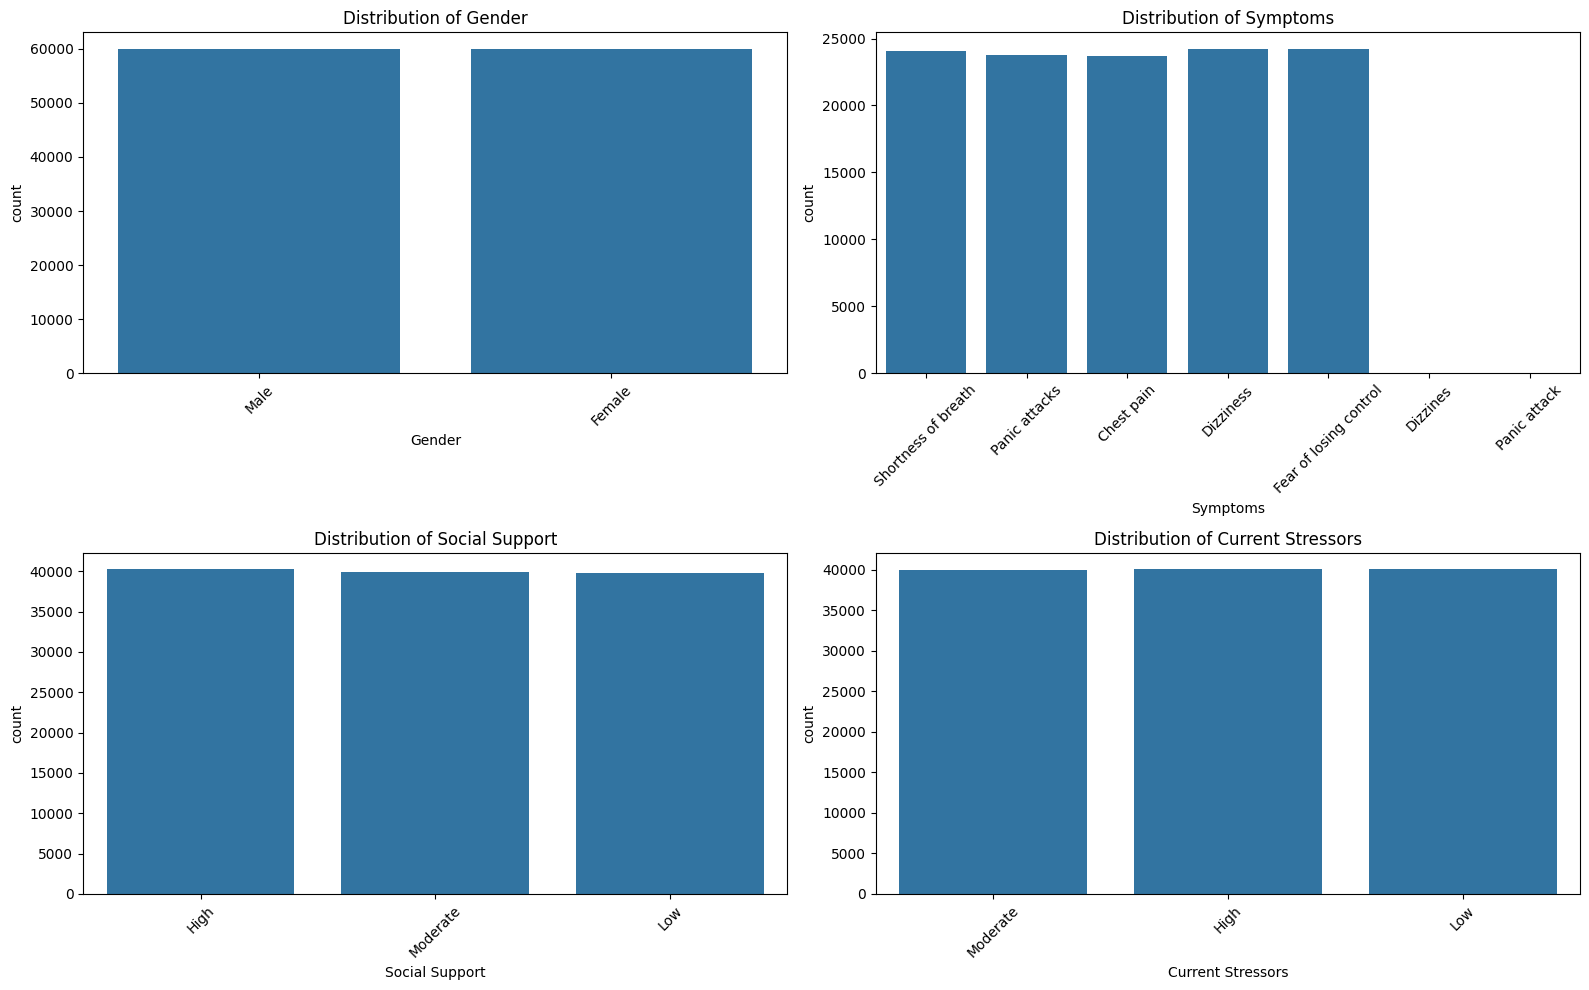

In [31]:
#1.4
#b-
# Countplots for categorical variables
categorical_columns = ['Gender', 'Symptoms', 'Social Support', 'Current Stressors']

plt.figure(figsize=(16, 10))
for idx, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, idx)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

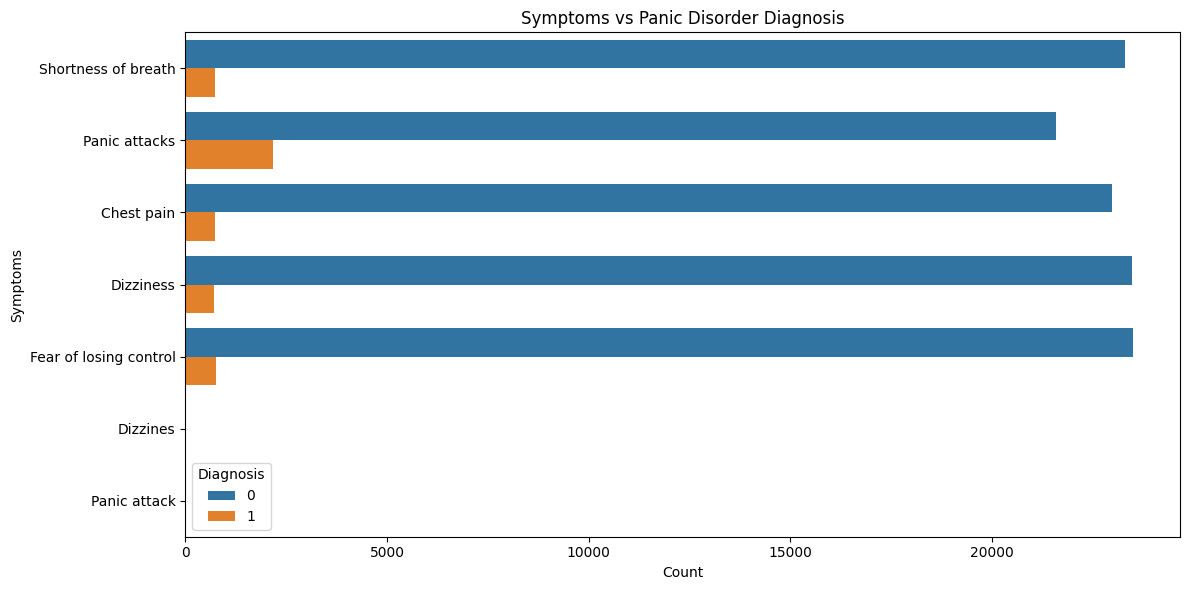

In [15]:
#1.4 C-
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Symptoms', hue='Panic Disorder Diagnosis')
plt.title('Symptoms vs Panic Disorder Diagnosis')
plt.xlabel('Count')
plt.ylabel('Symptoms')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

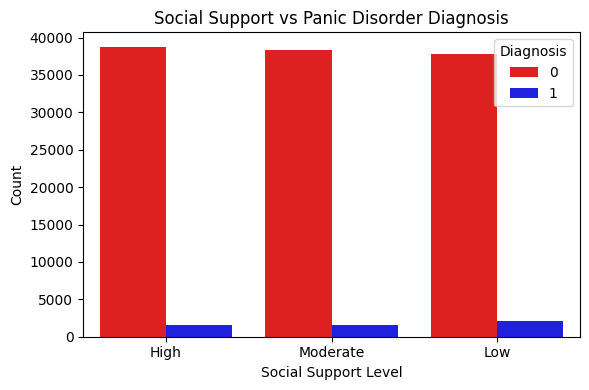

In [23]:
#1.4 D-
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Social Support', hue='Panic Disorder Diagnosis', palette={0: 'red', 1: 'BLUE'})
plt.title('Social Support vs Panic Disorder Diagnosis')
plt.xlabel('Social Support Level')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

In [37]:
#1.5 A-
# Print class counts
print(df['Panic Disorder Diagnosis'].value_counts())
print("\nClass distribution (in %):")
print(df['Panic Disorder Diagnosis'].value_counts(normalize=True) * 100)


Panic Disorder Diagnosis
0    114858
1      5142
Name: count, dtype: int64

Class distribution (in %):
Panic Disorder Diagnosis
0    95.715
1     4.285
Name: proportion, dtype: float64


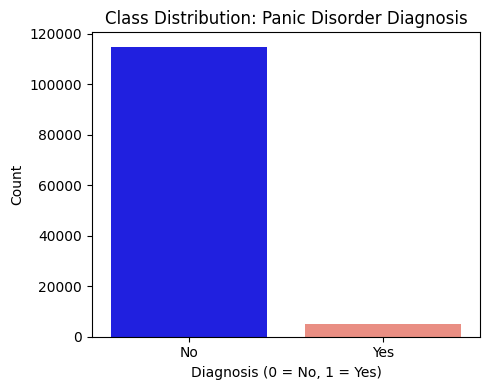

In [39]:
#1.5 B-
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Panic Disorder Diagnosis', hue='Panic Disorder Diagnosis',
              palette={0: 'blue', 1: 'salmon'}, legend=False)
plt.title('Class Distribution: Panic Disorder Diagnosis')
plt.xlabel('Diagnosis (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()


In [43]:
#Step 2: Data Cleaning & Transformation
#2.1  Handle missing values (either drop or impute them appropriately like mean/mode).
df['Medical History'] = df['Medical History'].fillna(df['Medical History'].mode()[0])
df['Psychiatric History'] = df['Psychiatric History'].fillna(df['Psychiatric History'].mode()[0])
df['Substance Use'] = df['Substance Use'].fillna(df['Substance Use'].mode()[0])

In [47]:
#2.2  Remove duplicate values (ensure label proportions remain unchanged).
before = df['Panic Disorder Diagnosis'].value_counts(normalize=True) * 100
print("Before dropping duplicates (%):\n", before)

Before dropping duplicates (%):
 Panic Disorder Diagnosis
0    95.715
1     4.285
Name: proportion, dtype: float64


In [49]:
#2.2  Remove duplicate values (ensure label proportions remain unchanged).
df = df.drop_duplicates()
after = df['Panic Disorder Diagnosis'].value_counts(normalize=True) * 100
after.name = "proportion"
print("After dropping duplicates (%):\n", after)

After dropping duplicates (%):
 Panic Disorder Diagnosis
0    95.705137
1     4.294863
Name: proportion, dtype: float64


In [55]:
#2.3 Convert categorical columns into consistent format (fix typos, lowercase, remove extra spaces).
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:\n", cat_cols)
for col in cat_cols:
    df.loc[:, col] = df[col].str.lower().str.strip()

Categorical columns:
 ['Gender', 'Family History', 'Personal History', 'Current Stressors', 'Symptoms', 'Severity', 'Impact on Life', 'Demographics', 'Medical History', 'Psychiatric History', 'Substance Use', 'Coping Mechanisms', 'Social Support', 'Lifestyle Factors']


In [57]:
#2.3
for col in cat_cols:
    print(f"\nUnique values in '{col}':")
    print(sorted(df[col].unique()))


Unique values in 'Gender':
['female', 'male']

Unique values in 'Family History':
['no', 'yes']

Unique values in 'Personal History':
['no', 'yes']

Unique values in 'Current Stressors':
['high', 'low', 'moderate']

Unique values in 'Symptoms':
['chest pain', 'dizzines', 'dizziness', 'fear of losing control', 'panic attack', 'panic attacks', 'shortness of breath']

Unique values in 'Severity':
['mild', 'moderate', 'severe']

Unique values in 'Impact on Life':
['mild', 'moderate', 'significant']

Unique values in 'Demographics':
['rural', 'urban']

Unique values in 'Medical History':
['asthma', 'diabetes', 'diabetic', 'heart disease']

Unique values in 'Psychiatric History':
['anxiety disorder', 'bipolar disorder', 'depressive disorder']

Unique values in 'Substance Use':
['alcohol', 'drugs']

Unique values in 'Coping Mechanisms':
['exercise', 'meditate', 'meditation', 'seeking therapy', 'socialize', 'socializing']

Unique values in 'Social Support':
['high', 'low', 'moderate']

Unique

In [3]:
#2.3
import pandas as pd
#To run smoothly, I added the path again
df = pd.read_csv("C:/Users/chida/Downloads/panic_disorder_detection.csv")
# Fix typos 
df.loc[:, 'Symptoms'] = df['Symptoms'].replace({
    'panic attack': 'panic attacks',
    'dizzines': 'dizziness'
})

df.loc[:, 'Medical History'] = df['Medical History'].replace({
    'diabetic': 'diabetes'
})

df.loc[:, 'Coping Mechanisms'] = df['Coping Mechanisms'].replace({
    'meditate': 'meditation',
    'socialize': 'socializing'
})

In [67]:
#2.4 Convert date-related fields (if any) into proper datetime format
print(df.dtypes)
date_cols = df.select_dtypes(include=['datetime', 'datetime64[ns]', 'object']).columns
found_date = False
for col in date_cols:
    try:
        pd.to_datetime(df[col])
        print(f"{col} can be converted to datetime.")
        found_date = True
    except:
        continue

if not found_date:
    print("No date-related columns found to convert.")


Participant ID               int64
Age                          int64
Gender                      object
Family History              object
Personal History            object
Current Stressors           object
Symptoms                    object
Severity                    object
Impact on Life              object
Demographics                object
Medical History             object
Psychiatric History         object
Substance Use               object
Coping Mechanisms           object
Social Support              object
Lifestyle Factors           object
Panic Disorder Diagnosis     int64
dtype: object
No date-related columns found to convert.


C:\Users\chida\AppData\Local\Temp\ipykernel_20684\371503803.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col])
C:\Users\chida\AppData\Local\Temp\ipykernel_20684\371503803.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col])
C:\Users\chida\AppData\Local\Temp\ipykernel_20684\371503803.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col])
C:\Users\chida\AppData\Local\Temp\ipykernel_20684\371503803.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dat

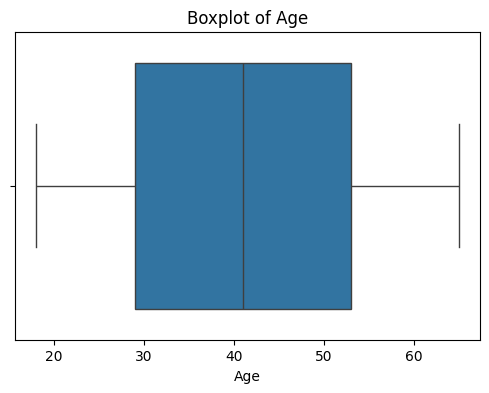

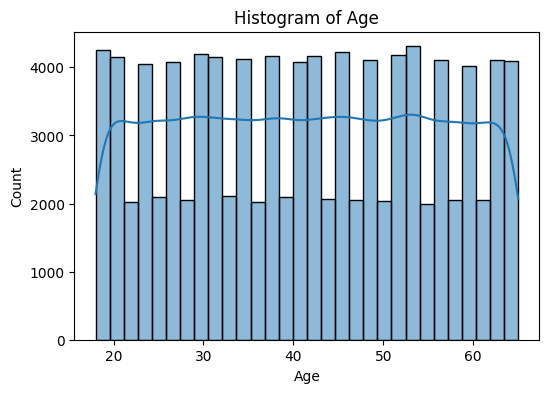

Lower bound: -7.0, Upper bound: 89.0


In [75]:
#2.5 Handle outliers in numerical columns (Age, Severity, etc.). Visualize distributions first (e.g.,boxplots or histograms) and possibly remove or cap/floor extreme values.
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Calculate IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

df = df[(df['Age'] >= 0) & (df['Age'] <= 91)]
df['Age'] = df['Age'].clip(lower=0, upper=91)

In [77]:
#Step 3: Handling Class Imbalance 
#3.1 Analyze the imbalance ratio in Panic Disorder Diagnosis.
# Count of each class
class_counts = df['Panic Disorder Diagnosis'].value_counts()
print("Class counts:\n", class_counts)

# Percentage of each class
class_percent = df['Panic Disorder Diagnosis'].value_counts(normalize=True) * 100
print("\nClass distribution (%):\n", class_percent)

Class counts:
 Panic Disorder Diagnosis
0    94938
1     4261
Name: count, dtype: int64

Class distribution (%):
 Panic Disorder Diagnosis
0    95.704594
1     4.295406
Name: proportion, dtype: float64


In [87]:
#3.2 ) Apply at least two class imbalance handling techniques:
#- Oversampling using SMOTE (Synthetic Minority Oversampling Technique).
#- Random oversampling of the minority class or random undersampling of the majority class.
#- Class-weight adjustments in models (alternative to resampling).
from imblearn.over_sampling import SMOTE
cat_cols = ['Gender', 'Family History', 'Personal History', 'Current Stressors', 'Symptoms',
            'Severity', 'Impact on Life', 'Demographics', 'Medical History', 'Psychiatric History',
            'Substance Use', 'Coping Mechanisms', 'Social Support', 'Lifestyle Factors']

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

X = df_encoded.drop('Panic Disorder Diagnosis', axis=1)
y = df_encoded['Panic Disorder Diagnosis']

#SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print("After SMOTE:\n", y_smote.value_counts())
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

print("After Random Oversampling:\n", y_ros.value_counts())

After SMOTE:
 Panic Disorder Diagnosis
0    94938
1    94938
Name: count, dtype: int64
After Random Oversampling:
 Panic Disorder Diagnosis
0    94938
1    94938
Name: count, dtype: int64


In [119]:
#Step 4: Feature Engineering
#(4.1.1) Encode categorical variables using one-hot encoding or label encoding
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns to encode:", cat_cols)

df_encoded = pd.get_dummies(df, columns=[
    'Gender', 'Family History', 'Personal History', 'Current Stressors', 'Symptoms',
    'Severity', 'Impact on Life', 'Demographics', 'Medical History',
    'Psychiatric History', 'Substance Use', 'Coping Mechanisms', 'Social Support',
    'Lifestyle Factors', 'Symptom Type'
], drop_first=True)

print("Shape after encoding:", df_encoded.shape)
print(df_encoded.head())

Categorical columns to encode: ['Gender', 'Family History', 'Personal History', 'Current Stressors', 'Symptoms', 'Severity', 'Impact on Life', 'Demographics', 'Medical History', 'Psychiatric History', 'Substance Use', 'Coping Mechanisms', 'Social Support', 'Lifestyle Factors', 'Symptom Type']
Shape after encoding: (99199, 34)
   Participant ID  Age  Panic Disorder Diagnosis   Age Group  High Risk Flag  \
0               1   38                         0       Adult               0   
1               2   51                         0  Middle Age               0   
2               3   32                         0       Adult               0   
3               4   64                         0      Senior               0   
4               5   31                         0       Adult               0   

   Healthy Lifestyle  Gender_male  Family History_yes  Personal History_yes  \
0                  0         True               False                  True   
1                  0         True

In [111]:
#(4.1.2) Scale numerical features (Age, Severity Score, etc.) using techniques like min-max, z-score, etc
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded['Age_scaled'] = scaler.fit_transform(df_encoded[['Age']])
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded['Age_scaled'] = scaler.fit_transform(df_encoded[['Age']])
#  before and after for Age
print(df_encoded[['Age_scaled']].head())

   Age_scaled
0    0.425532
1    0.702128
2    0.297872
3    0.978723
4    0.276596


In [117]:
#(4.1.3) Create new features based on existing columns (e.g., Impact on Life levels). (If necessary)
df['High Risk Flag'] = ((df['Severity'] == 'severe') & (df['Impact on Life'] == 'significant')).astype(int)
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100],
                         labels=['Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior'])
df['Healthy Lifestyle'] = df['Lifestyle Factors'].apply(
    lambda x: 1 if 'exercise' in x and 'sleep quality' in x else 0
)
print(df[['Severity', 'Impact on Life', 'High Risk Flag']].head())
print(df[['Age', 'Age Group']].head())
print(df[['Lifestyle Factors', 'Healthy Lifestyle']].head())

   Severity Impact on Life  High Risk Flag
0      mild           mild               0
1      mild           mild               0
2      mild    significant               0
3  moderate       moderate               0
4      mild       moderate               0
   Age   Age Group
0   38       Adult
1   51  Middle Age
2   32       Adult
3   64      Senior
4   31       Adult
  Lifestyle Factors  Healthy Lifestyle
0     sleep quality                  0
1     sleep quality                  0
2          exercise                  0
3          exercise                  0
4     sleep quality                  0


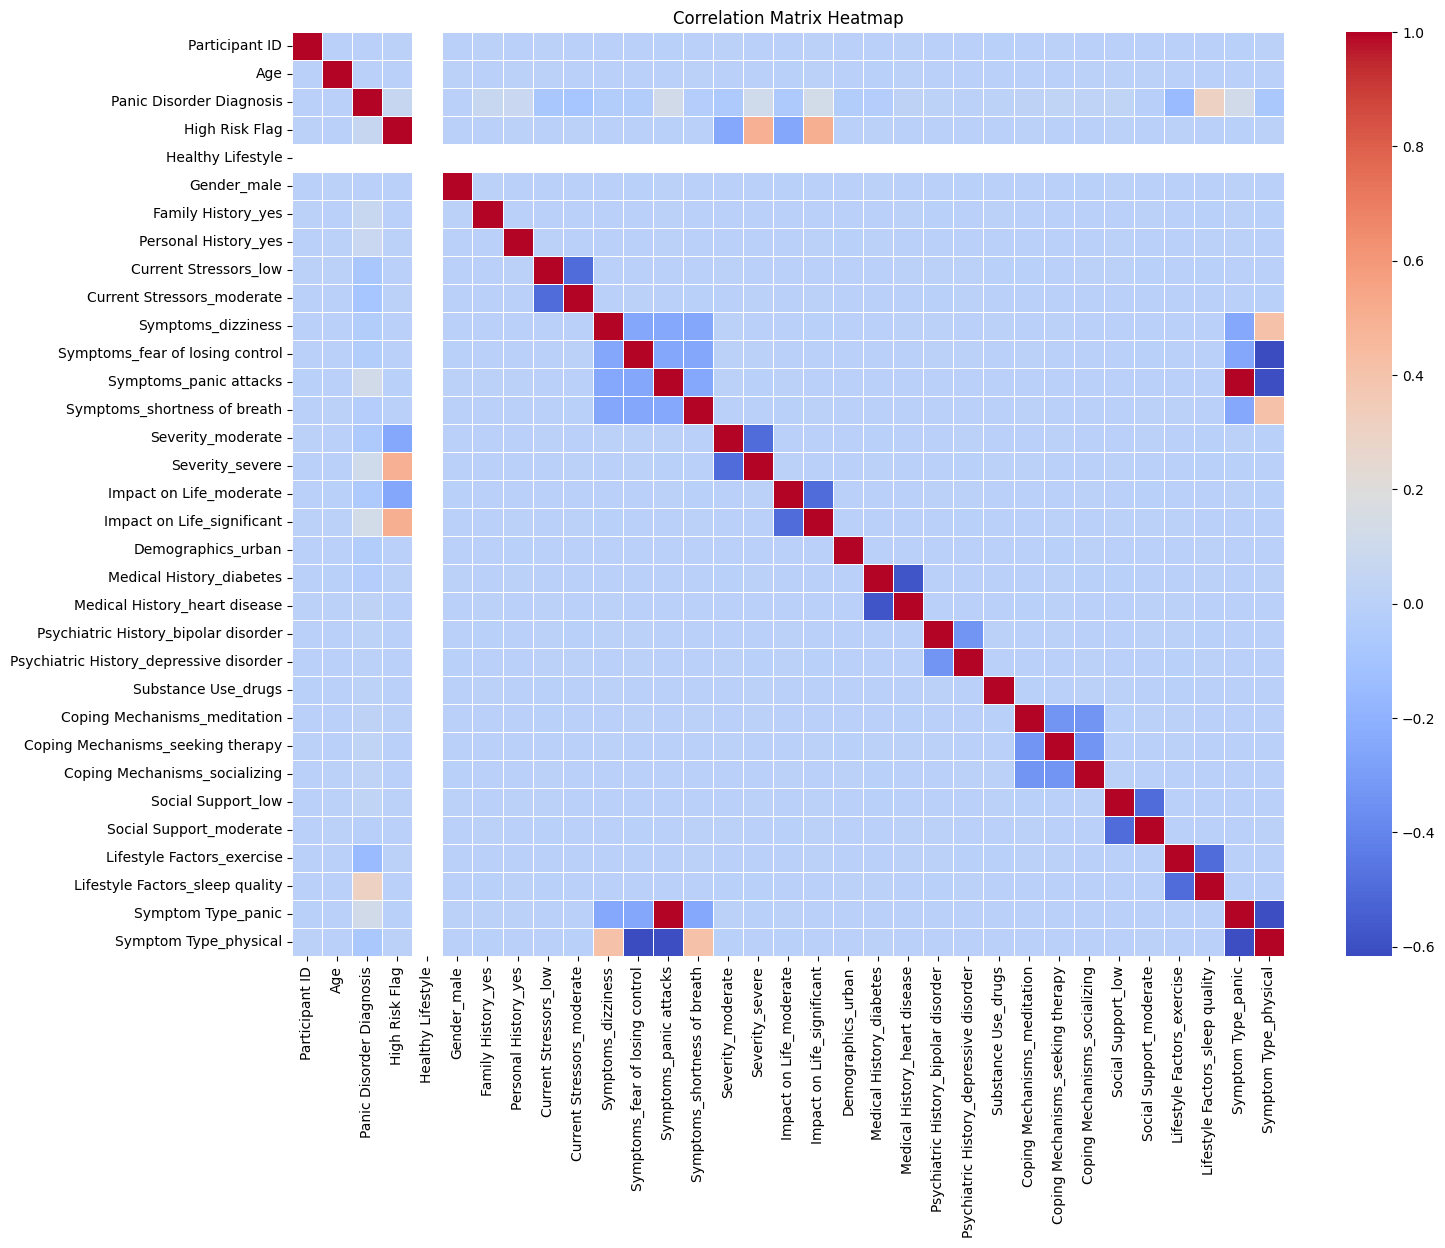

In [125]:
#Step 5: Feature Importance Analysis
#5.1 Correlation Analysis
#(5.1.1) Compute the correlation matrix to see relationships between numerical features. Plot a heatmap of the correlation matrix.
# Compute correlation matrix
corr_matrix = df_encoded.corr(numeric_only=True)
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [127]:
#(5.1.2) Colinearity - Identify highly correlated features that might be redundant (if any).
# Compute correlation matrix
corr_matrix = df_encoded.corr(numeric_only=True)

# Set threshold
threshold = 0.9
high_corr = []

for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i, j]) > threshold:
            pair = tuple(sorted((i, j)))
            if pair not in high_corr:
                high_corr.append(pair)

print("Highly correlated feature pairs (|corr| > 0.9):")
for i, j in high_corr:
    print(f"{i} ↔ {j} | Corr: {corr_matrix.loc[i, j]:.2f}")

Highly correlated feature pairs (|corr| > 0.9):
Symptom Type_panic ↔ Symptoms_panic attacks | Corr: 1.00


                            Feature  Importance
29  Lifestyle Factors_sleep quality    0.148518
0                    Participant ID    0.091160
1                               Age    0.082468
8        Current Stressors_moderate    0.070574
16       Impact on Life_significant    0.063961
7             Current Stressors_low    0.062990
14                  Severity_severe    0.059070
5                Family History_yes    0.045967
6              Personal History_yes    0.042426
17               Demographics_urban    0.021484


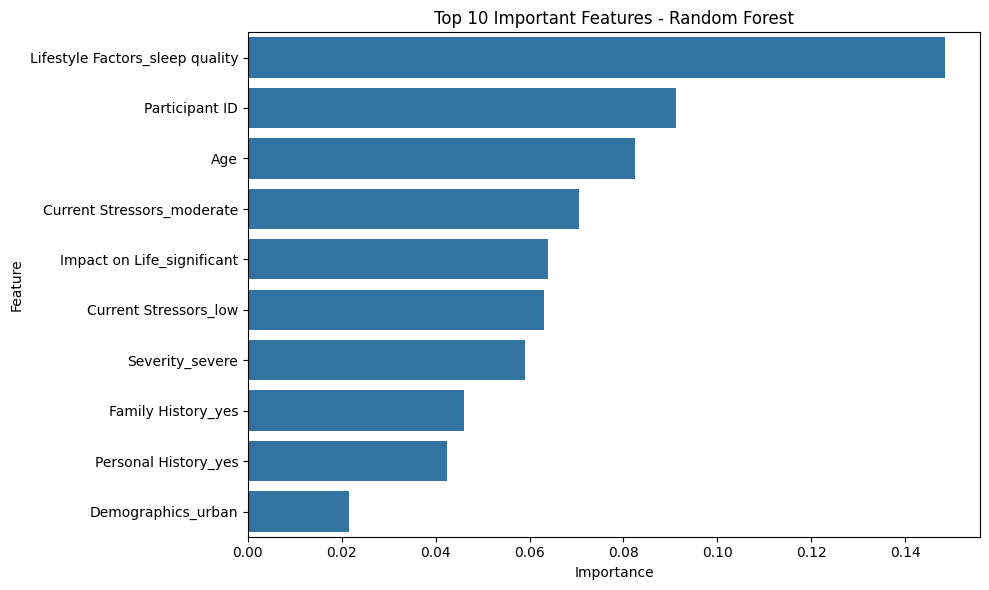

In [143]:
#5.2 Feature Importance from Models 
#5.2.1 Train a Random Forest model and extract feature importance scores.
from sklearn.model_selection import train_test_split

# Features and target
X = df_encoded.drop('Panic Disorder Diagnosis', axis=1)
y = df_encoded['Panic Disorder Diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

X = df_encoded.drop(['Panic Disorder Diagnosis', 'Age Group'], axis=1)
y = df_encoded['Panic Disorder Diagnosis']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to display top features
import pandas as pd

feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top 10
print(feat_imp_df.head(10))
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features - Random Forest")
plt.tight_layout()
plt.show()

C:\Users\chida\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Top positive predictors:
                                    Feature  Coefficient
16               Impact on Life_significant     9.874052
14                          Severity_severe     9.756603
29          Lifestyle Factors_sleep quality     9.529963
24        Coping Mechanisms_seeking therapy     2.116503
5                        Family History_yes     2.095424
6                      Personal History_yes     2.085877
25            Coping Mechanisms_socializing     2.028936
23             Coping Mechanisms_meditation     1.982560
26                       Social Support_low     1.513042
21  Psychiatric History_depressive disorder     0.645662

Top negative predictors:
                            Feature  Coefficient
18         Medical History_diabetes    -0.401761
17               Demographics_urban    -0.520785
11           Symptoms_panic attacks    -0.614752
30               Symptom Type_panic    -0.614752
8        Current Stressors_moderate    -6.306044
7             Current Stress

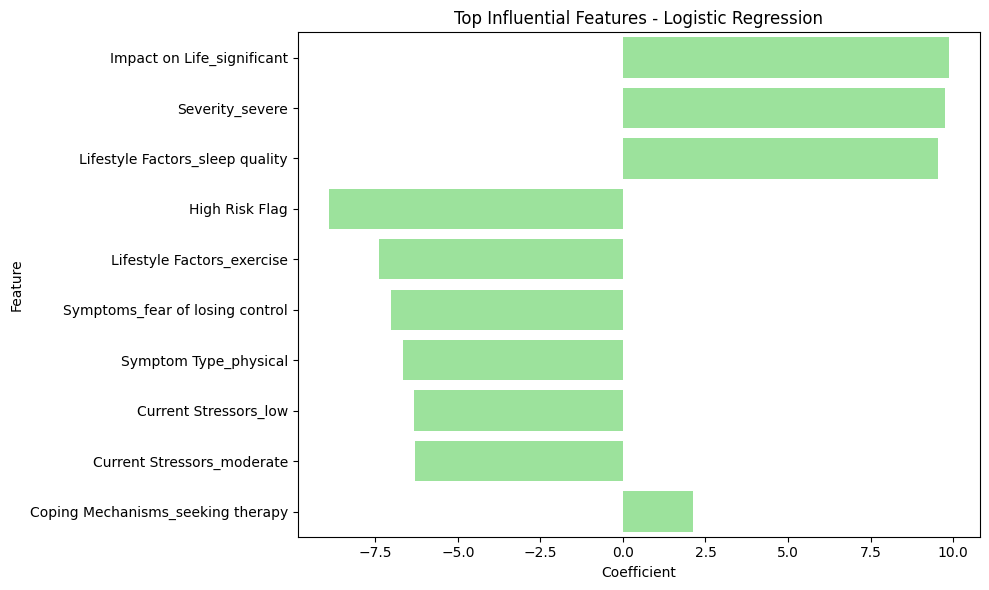

In [167]:
#(5.2.2) Train a Logistic Regression model and analyze coefficients.
X = df_encoded.drop(['Panic Disorder Diagnosis', 'Age Group'], axis=1)
y = df_encoded['Panic Disorder Diagnosis']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)

# Create DataFrame of coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Top positive and negative predictors
print("Top positive predictors:")
print(coef_df.head(10))

print("\nTop negative predictors:")
print(coef_df.tail(10))
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_coef = coef_df.sort_values(by='Coefficient', key=abs, ascending=False).head(10)
sns.barplot(data=top_coef, x='Coefficient', y='Feature', color='lightGreen')
plt.title('Top Influential Features - Logistic Regression')
plt.tight_layout()
plt.show()

In [177]:
#Step 6: Model Training & Evaluation
#6.1 Model Selection & Training
#6.1.1 Split the dataset into training and test sets (80-20 or 70-30 split).
from sklearn.model_selection import train_test_split

# Split features and target
X = df_encoded.drop('Panic Disorder Diagnosis', axis=1)
y = df_encoded['Panic Disorder Diagnosis']

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [189]:
#(6.1.2) Train at least three different classification models:
#- Logistic Regression
#- Random Forest
#- Support Vector Machine (SVM) or KNN

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)


# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

C:\Users\chida\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [9]:
#(6.1.3) Use cross-validation to tune hyperparameters.

import pandas as pd

df = pd.read_csv("C:/Users/chida/Downloads/panic_disorder_detection.csv")
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop(['Panic Disorder Diagnosis', 'Age Group'], axis=1, errors='ignore')
y = df_encoded['Panic Disorder Diagnosis']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid,
                           cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'solver': 'liblinear'}


In [12]:
#(6.1.3) Use cross-validation to tune hyperparameters.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#hyperparameter grid
rf_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(estimator=rf, param_grid=rf_grid,
                     cv=5, scoring='f1', n_jobs=-1)
rf_cv.fit(X_train, y_train)

# best parameters
print("Best Random Forest Parameters:", rf_cv.best_params_)

Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [22]:
#6.2 Model Evaluation & Comparison
#6.2.1 Compute evaluation metrics
#Accuracy
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=10, solver='liblinear', class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9435833333333333


In [15]:
#6.2Precision, Recall, F1-score
from sklearn.metrics import precision_score, recall_score, f1_score
#Precision, Recall, F1-score
y_pred = model.predict(X_test)
# Evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

Precision: 0.4314550042052145
Recall   : 0.9980544747081712
F1 Score : 0.6024662360540223


AUC Score: 0.9823099648972087


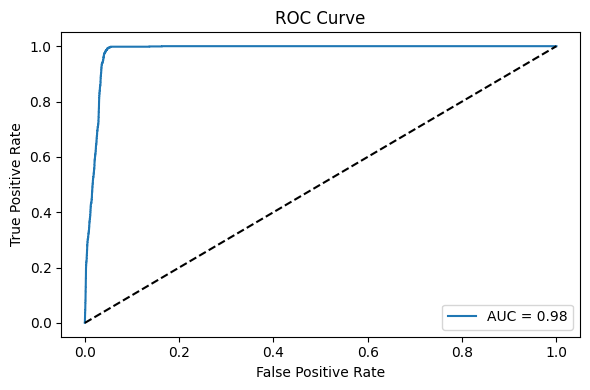

In [17]:
#ROC Curve & AUC Score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# Compute AUC
auc = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [33]:
#(6.2.2) Compare all models before and after handling class imbalance.
# All models compared are run by each cell for a smooth run
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [35]:
#6.2.2
def evaluate_model(model, X_train, y_train, X_test, y_test, label=""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"--- {label} ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}\n")
    return {"Model": label, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}

In [37]:
#6.2.2
results = []
# Logistic Regression (imbalanced)
logreg = LogisticRegression(C=10, solver='liblinear', class_weight='balanced', max_iter=1000, random_state=42)
results.append(evaluate_model(logreg, X_train, y_train, X_test, y_test, "LogReg (Imbalanced)"))

# Random Forest (imbalanced)
rf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
results.append(evaluate_model(rf, X_train, y_train, X_test, y_test, "RF (Imbalanced)"))

# KNN (imbalanced)
knn = KNeighborsClassifier(n_neighbors=5)
results.append(evaluate_model(knn, X_train, y_train, X_test, y_test, "KNN (Imbalanced)"))


--- LogReg (Imbalanced) ---
Accuracy : 0.9436
Precision: 0.4315
Recall   : 0.9981
F1 Score : 0.6025

--- RF (Imbalanced) ---
Accuracy : 0.9914
Precision: 0.9185
Recall   : 0.8765
F1 Score : 0.8970

--- KNN (Imbalanced) ---
Accuracy : 0.9554
Precision: 0.1791
Recall   : 0.0117
F1 Score : 0.0219



In [38]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [39]:
# Logistic Regression (balanced)
logreg_bal = LogisticRegression(C=10, solver='liblinear', max_iter=1000, random_state=42)
results.append(evaluate_model(logreg_bal, X_train_bal, y_train_bal, X_test, y_test, "LogReg (Balanced)"))

# Random Forest (balanced)
rf_bal = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
results.append(evaluate_model(rf_bal, X_train_bal, y_train_bal, X_test, y_test, "RF (Balanced)"))

# KNN (balanced)
knn_bal = KNeighborsClassifier(n_neighbors=5)
results.append(evaluate_model(knn_bal, X_train_bal, y_train_bal, X_test, y_test, "KNN (Balanced)"))

--- LogReg (Balanced) ---
Accuracy : 0.9370
Precision: 0.3736
Recall   : 0.6955
F1 Score : 0.4861

--- RF (Balanced) ---
Accuracy : 0.9734
Precision: 0.6670
Recall   : 0.7558
F1 Score : 0.7086

--- KNN (Balanced) ---
Accuracy : 0.7102
Precision: 0.0722
Recall   : 0.4864
F1 Score : 0.1257



In [40]:
#For more clear view
df_results = pd.DataFrame(results)
display(df_results)

Model  Accuracy  Precision    Recall        F1
0  LogReg (Imbalanced)  0.943583   0.431455  0.998054  0.602466
1      RF (Imbalanced)  0.991375   0.918451  0.876459  0.896964
2     KNN (Imbalanced)  0.955375   0.179104  0.011673  0.021918
3    LogReg (Balanced)  0.937000   0.373563  0.695525  0.486064
4        RF (Balanced)  0.973375   0.666953  0.755837  0.708618
5       KNN (Balanced)  0.710208   0.072181  0.486381  0.125707

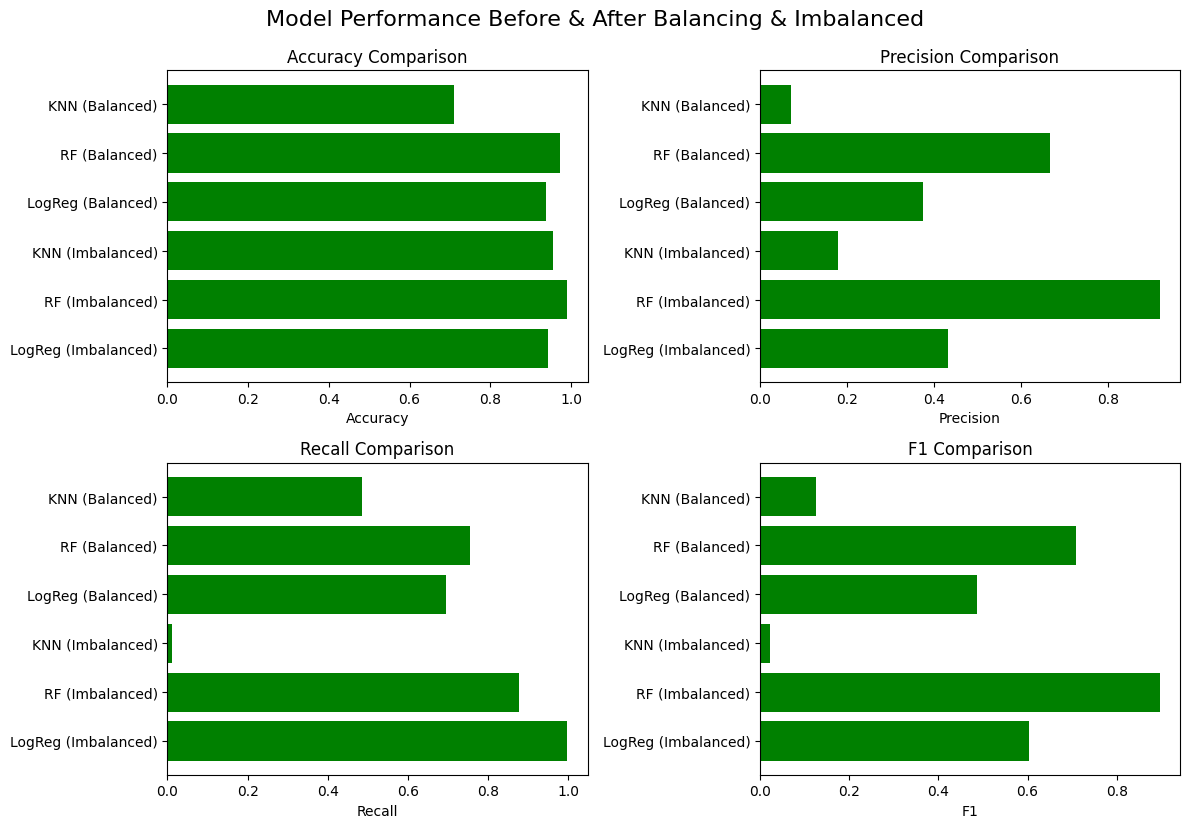

In [70]:
#6.2.3 Visualize and compare results of different models using bar plots
df_results = pd.DataFrame(results)
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.barh(df_results['Model'], df_results[metric], color='green')
    plt.title(f'{metric} Comparison')
    plt.xlabel(metric)
    plt.tight_layout()

plt.suptitle("Model Performance Before & After Balancing & Imbalanced", fontsize=16, y=1.03)
plt.show()